
Şimdi, ilk regresyon modelinizi tasarlama sırası sizde. Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. Verileri ve değişkenlerin açıklamalarını burada bulabilirsiniz: 
Ev Fiyatları Verileri inceleyin ve gerekli tüm verileri temizleyin.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats.mstats import winsorize
from sklearn import linear_model


In [2]:
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


SalePrice değişkenini etkileyen 5 farklı değişken seçildi.

In [4]:
df=data.loc[:, ['Street', 'OverallQual', 'YearBuilt', 'MSSubClass', 'ExterQual', 'SalePrice']]
df.head(10)

,Street,OverallQual,YearBuilt,MSSubClass,ExterQual,SalePrice
0,Pave,7,2003,60,Gd,208500
1,Pave,6,1976,20,TA,181500
2,Pave,7,2001,60,Gd,223500
3,Pave,7,1915,70,TA,140000
4,Pave,8,2000,60,Gd,250000
5,Pave,5,1993,50,TA,143000
6,Pave,8,2004,20,Gd,307000
7,Pave,7,1973,60,TA,200000
8,Pave,7,1931,50,TA,129900
9,Pave,5,1939,190,TA,118000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
Street         1460 non-null object
OverallQual    1460 non-null int64
YearBuilt      1460 non-null int64
MSSubClass     1460 non-null int64
ExterQual      1460 non-null object
SalePrice      1460 non-null int64
dtypes: int64(4), object(2)
memory usage: 68.5+ KB


**Eksik değer var mı bakalım**

In [6]:
df.isnull().sum()*100/df.count()

Street         0.0
OverallQual    0.0
YearBuilt      0.0
MSSubClass     0.0
ExterQual      0.0
SalePrice      0.0
dtype: float64

**Veride eksik değer yok**

**Veride aykırı değer var mı bakıyoruz.**

<Figure size 432x288 with 0 Axes>

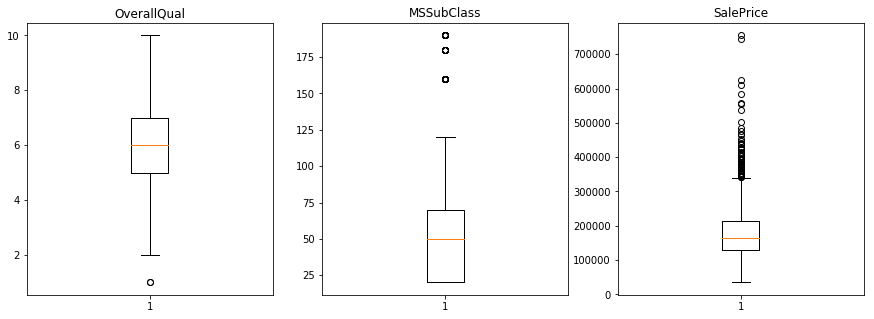

In [7]:
plt.clf()
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(df['OverallQual'])
plt.title("OverallQual")

plt.subplot(1,3,2)
plt.boxplot(df['MSSubClass'])
plt.title("MSSubClass")

plt.subplot(1,3,3)
plt.boxplot(df['SalePrice'])
plt.title("SalePrice")

plt.show()

SalePrice değişkeninde oldukça fazla aykırı değer var winsorize ile dolduralım.

Text(0.5, 1.0, 'Winsorize Saleprice')

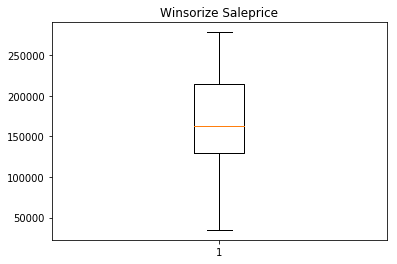

In [8]:
df['wins_sprice'] = winsorize(df["SalePrice"], (0, 0.10))
plt.boxplot(df['wins_sprice'])
plt.title("Winsorize Saleprice")

aykırı değerlerden kurtulmuş olduk

In [9]:
df["Str"] = pd.get_dummies(df.Street, drop_first=True)
df["Ext"] = df.ExterQual.replace({'Gd':1, "TA":0, "Ex":2, "Fa":3})
df[['Str','Ext']].head(10)

,Str,Ext
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1
5,1,0
6,1,1
7,1,0
8,1,0
9,1,0


**Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.**

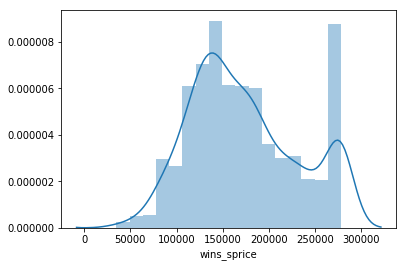

In [43]:
sns.distplot(df['wins_sprice'])

([<matplotlib.axis.XTick at 0x98305c0>, <matplotlib.axis.XTick at 0x982eeb8>],
 <a list of 2 Text xticklabel objects>)

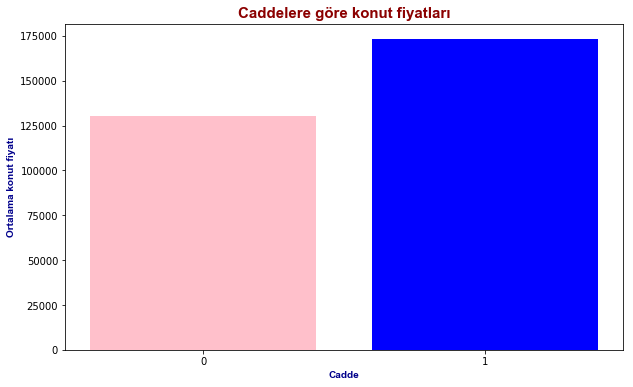

In [10]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,6))
plt.bar(df.groupby("Str")["wins_sprice"].mean().index, 
        df.groupby("Str")["wins_sprice"].mean(),
        color=("pink","blue"))
plt.title("Caddelere göre konut fiyatları", fontdict = baslik_font)
plt.ylabel("Ortalama konut fiyatı", fontdict = eksen_font)
plt.xlabel("Cadde", fontdict = eksen_font)
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x6675da0>,
 <a list of 4 Text xticklabel objects>)

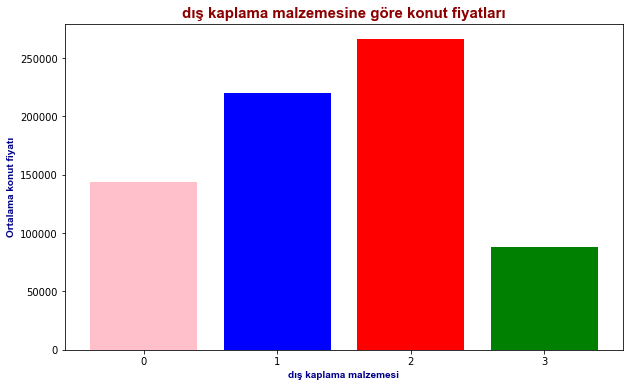

In [24]:
plt.figure(figsize=(10,6))
plt.bar(df.groupby("Ext")["wins_sprice"].mean().index, 
        df.groupby("Ext")["wins_sprice"].mean(),
     
        color=("pink","blue", "red", "green"))
plt.title("dış kaplama malzemesine göre konut fiyatları", fontdict = baslik_font)
plt.ylabel("Ortalama konut fiyatı", fontdict = eksen_font)
plt.xlabel("dış kaplama malzemesi", fontdict = eksen_font)
plt.xticks([0,1,2,3])

Grafiklerdende görülebileceği gibi, ortalama konut fiyatları her grup arasında farklı görünmektedir. 

**Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.**

In [11]:
Y = df['wins_sprice']
X = df[['Str','OverallQual', 'YearBuilt', 'MSSubClass', 'Ext' ]]

In [12]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [11527.90888633 27907.98029725   328.26756103  -149.72820846
  9105.18753652]
Sabit değer (bias): 
 -651217.8938161852


In [14]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wins_sprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     680.3
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:05:45   Log-Likelihood:                -17212.
No. Observations:                1460   AIC:                         3.444e+04
Df Residuals:                    1454   BIC:                         3.447e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.512e+05   6.73e+04     -9.680      0.000   -7.83e+05   -5.19e+05
Str          1.153e+04   1.33e+04      0.866      0.387   -1.46e+04    3.77e+04
OverallQual  2.791e+04    818.257     34.107      0.000    2.63e+04    2.95e+04
YearBuilt     328.2676     34.737      9.450      0.000     260.127     396.408
MSSubClass   -149.7282     19.796     -7.563      0.000    -188.561    -110.896
Ext          9105.1875   1748.052      5.209      0.000    5676.214    1.25e+04
==============================================================================
Omnibus:                       60.671   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.659
Skew:                           0.328   Prob(JB):                     1.88e-23
Kurtosis:                       4.136   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p değerleri Street değişkeni hariç <0.001'den yani Street değişkeni hariç diğerleri tahmin modelini açıklamamızda etkili